### The example from slide 19 with iterations

In [5]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def der_sigmoid(x):
    return np.exp(x)/(1+np.exp(x))**2

In [7]:
# inital synapses 
synl1 = np.array([[0.8,0.2],[0.4,0.9],[0.3,0.5]] )
synl2 = np.array([0.3,0.5,0.9] )

In [8]:
# training test
a1 = np.array([1.,1.])
y = np.array([0.])

In [9]:
# learning parameter for the gradient descent algorithm
alpha = 1.

In [10]:
niter=1000;
error=np.zeros((niter))

for i in range(niter):
    # forward propagation
    z2 = np.matmul(synl1,a1)
    a2 = sigmoid(z2)
    
    z3 = np.matmul(synl2,a2)
    a3 = sigmoid(z3)

    error[i]= a3-y
        
    # backpropagation
    # The Di are the derivatives of J with respect to z
    D3=(a3-y)*der_sigmoid(z3)
    D2=D3*synl2*der_sigmoid(z2)
    
    #gradient
    der23 = a2*D3
    der12 = np.matmul(np.array([a1]).T,np.array([D2]))
    
    #upgrade of the weights
    synl1 -= alpha*der12.T
    synl2 -= alpha*der23.T

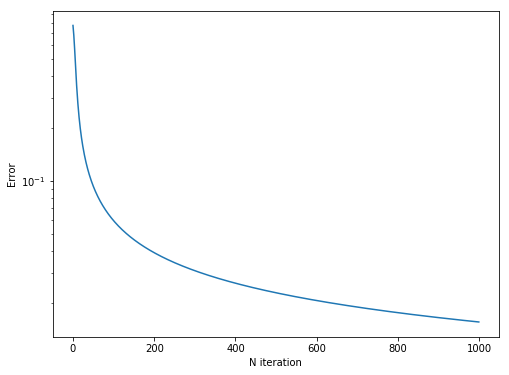

In [11]:
plt.figure(figsize=(8,6))
plt.semilogy(np.arange(niter),error)
plt.xlabel('N iteration')
plt.ylabel('Error')
plt.savefig('fig1.png')
plt.show()